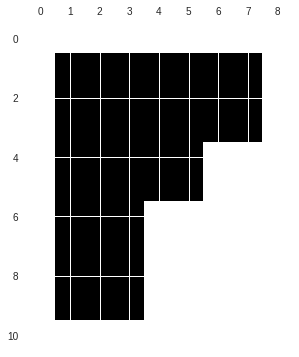

In [0]:
import numpy as np
import scipy.signal as signal

def rhs(x, y):
    # Element-wise multiplication
    return np.multiply(x, (x - y)**3)

def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

def problemOneSolverPartTwo(rightHandSide, *args, **kwargs):

    # problemOneSolver solves the poisson equation on the defined domain
# leveraging the poisson equation on the given domain with step
# size of 0.5. Argument rightHandSide is a function pointer to a matlab
# function
    
    # DE Operator Matrix initialized here with specific indices
    D = np.dot(4, np.eye(43))
    # Add -1 to neighbors to specific indices during iterative loop (below)
    row_indices = np.concatenate([[1],[1],[2],[2],[2],[3],[3],[3],[4],[4],[4],
        [5],[5],[5],[6],[6],[6],[7],[7],[8],[8],[8],[9],[9],[9],[9],
        [10],[10],[10],[10],[11],[11],[11],[11],[12],[12],[12],[12],
        [13],[13],[13],[13],[14],[14],[14],[15],[15],[15],[16],[16],
        [16],[16],[17],[17],[17],[17],[18],[18],[18],[18],[19],[19],
        [19],[19],[20],[20],[20],[21],[21],[22],[22],[22],[23],[23],
        [23],[23],[24],[24],[24],[24],[25],[25],[25],[25],[26],[26],
        [26],[27],[27],[27],[28],[28],[28],[28],[29],[29],[29],[29],
        [30],[30],[30],[31],[31],[32],[32],[32],[33],[33],[33],[33],
        [34],[34],[34],[35],[35],[35],[36],[36],[36],[36],[37],[37],
        [37],[38],[38],[38],[39],[39],[39],[39],[40],[40],[40],[41],
        [41],[42],[42],[42],[43],[43]], axis = 0)

    column_indices = np.concatenate([[2],[8],[1],[9],[3],[2],[10],[4],[3],[11],[5],[4],
        [12],[6],[5],[13],[7],[6],[14],[1],[9],[15],[2],[10],[16],[8],[3],
        [11],[17],[9],[4],[12],[18],[10],[5],[13],[19],[11],[6],[14],[20],
        [12],[7],[21],[13],[8],[16],[22],[9],[17],[23],[15],[10],[18],[24],
        [16],[11],[19],[25],[17],[12],[20],[26],[18],[19],[13],[21],[20],[14],
        [15],[23],[27],[16],[24],[28],[22],[17],[25],[29],[23],[18],[26],[30],
        [24],[19],[31],[25],[22],[28],[32],[23],[29],[33],[27],[24],[30],[34],
        [28],[25],[31],[29],[26],[30],[27],[33],[35],[28],[34],[36],[32],[29],
        [37],[33],[32],[36],[38],[33],[37],[39],[35],[34],[40],[36],[35],[39],
        [41],[36],[40],[42],[38],[37],[43],[39],[38],[42],[41],[39],[43],[42],
        [40]], axis = 0)


    for k in range(0, 43):
        D[row_indices[k], column_indices[k]]= -1

    domain = np.vstack([
        [1,1,1,1,1,1,1,1,1],
        [1,1,1,1,1,1,1,1,1],
        [1,1,1,1,1,1,1,1,1],
        [1,1,1,1,1,0,0,0,0],
        [1,1,1,1,1,0,0,0,0],
        [1,1,1,0,0,0,0,0,0],
        [1,1,1,0,0,0,0,0,0]
    ])
#     # Retrieve x and y points that will be evaluated
    yPoints, xPoints = np.nonzero(domain)
    xPoints = np.dot(0.5, xPoints)
    yPoints = np.dot(0.5, yPoints)
#   # Evaluate right hand side at points
    rhsVector = np.dot(0.5 ** 2, rightHandSide(xPoints, yPoints))
#   # Solve the solution vector
    solutionVector = np.linalg.solve(D, rhsVector)
#   # X and Y coordinates
    X, Y = np.meshgrid(np.arange(0, 4.5, 0.5), np.arange(0, 5.5, 0.5))

    seven_by_one = np.zeros((7, 1))
    one_by_eleven = np.zeros((1, 11))

    Z = np.concatenate((seven_by_one, domain, seven_by_one), axis  = 1)
    Z = np.concatenate((one_by_eleven, Z, one_by_eleven), axis = 0).T
    
    (i, j) = (Z != 0).nonzero()
    for solution in np.arange(0, np.size(solutionVector)).reshape(-1):
      Z[i, j] = solutionVector[i]
     

    # plot the pattern of Z
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    ax.spy(Z);
    

#     print(X.shape)
   # Remove x and y coordinates that are not within the domain or boundary
    arr_temp = np.vstack([[1,1,1],[1,0,1],[1,1,1]])
    convolve2d_temp = np.logical_not(signal.convolve2d(Z, arr_temp, mode='same'))
    zeroIndices = np.where(convolve2d_temp)

    X[zeroIndices] = np.nan
    Y[zeroIndices] = np.nan   
    
    return X, Y, Z

X, Y, Z = problemOneSolverPartTwo(rhs)

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


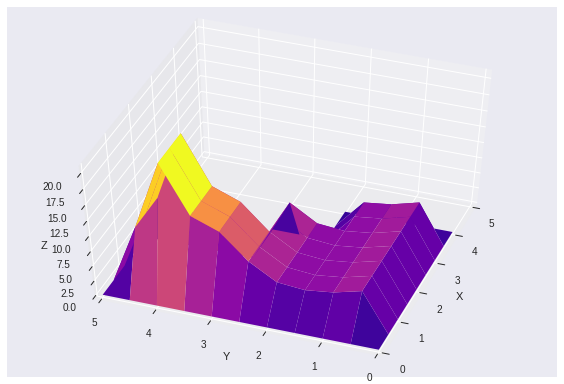

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                       cmap='plasma', edgecolor='none')


ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
#----- Static image
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.tight_layout()
ax.view_init(azim=200, elev=50)
plt.show()

In [0]:
from IPython.core.display import display, HTML
import json
import numpy as np

def plot3D(X, Y, Z, height=600, xlabel = "X", ylabel = "Y", zlabel = "Z", initialCamera = None):

    options = {
        "width": "100%",
        "style": "surface",
        "showPerspective": True,
        "showGrid": True,
        "showShadow": False,
        "keepAspectRatio": True,
        "height": str(height) + "px"
    }

    if initialCamera:
        options["cameraPosition"] = initialCamera
        
    data = [ {"x": X[y,x], "y": Y[y,x], "z": Z[y,x]} for y in range(X.shape[0]) for x in range(X.shape[1]) ]
    visCode = r"""
       <link href="https://cdnjs.cloudflare.com/ajax/libs/vis/4.21.0/vis.min.css" type="text/css" rel="stylesheet" />
       <script src="https://cdnjs.cloudflare.com/ajax/libs/vis/4.21.0/vis.min.js"></script>
       <div id="pos" style="top:0px;left:0px;position:absolute;"></div>
       <div id="visualization"></div>
       <script type="text/javascript">
        var data = new vis.DataSet();
        data.add(""" + json.dumps(data) + """);
        var options = """ + json.dumps(options) + """;
        var container = document.getElementById("visualization");
        var graph3d = new vis.Graph3d(container, data, options);
        graph3d.on("cameraPositionChange", function(evt)
        {
            elem = document.getElementById("pos");
            elem.innerHTML = "H: " + evt.horizontal + "<br>V: " + evt.vertical + "<br>D: " + evt.distance;
        });
       </script>
    """
    htmlCode = "<iframe srcdoc='"+visCode+"' width='100%' height='" + str(height) + "px' style='border:0;' scrolling='no'> </iframe>"
    display(HTML(htmlCode))


In [0]:
plot3D(X, Y, Z)